In [59]:
# Basics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split

# Models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz


# Warnings
import warnings as ws
ws.filterwarnings('ignore')


In [60]:
# Load Dataset
banknote_dataset = pd.read_csv('https://raw.githubusercontent.com/Kuntal-G/Machine-Learning/master/R-machine-learning/data/banknote-authentication.csv')
banknote_dataset.head()

,variance,skew,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [61]:
banknote_dataset.describe()

,variance,skew,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [62]:
df = pd.DataFrame(banknote_dataset)
df

,variance,skew,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [63]:
df = df.astype(float)
df['class'] = df['class'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skew      1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   object 
dtypes: float64(4), object(1)
memory usage: 53.7+ KB


## DATA PREPROCESSING

In [64]:
X = df[['variance', 'skew', 'curtosis', 'entropy']].values
X[0:5]

array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ],
       [ 3.866  , -2.6383 ,  1.9242 ,  0.10645],
       [ 3.4566 ,  9.5228 , -4.0112 , -3.5944 ],
       [ 0.32924, -4.4552 ,  4.5718 , -0.9888 ]])

In [65]:
Y = df['class']
Y[0:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: object

## Training and Testing Data set

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

## Modelling using Decision Tree Classifier

In [67]:
bank_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
bank_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
bank_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
pred_tree = bank_tree.predict(x_test)
pred_tree[0:5]

array(['1.0', '0.0', '0.0', '1.0', '1.0'], dtype=object)

In [70]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred_tree))

DecisionTrees's Accuracy:  0.9635922330097088


## Data Visualization

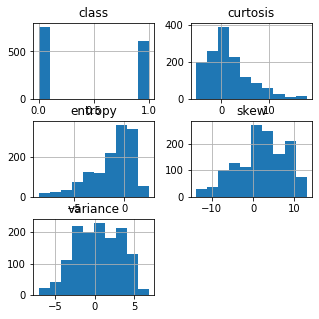

In [71]:
banknote_dataset.hist(figsize = (5,5))
plt.show()

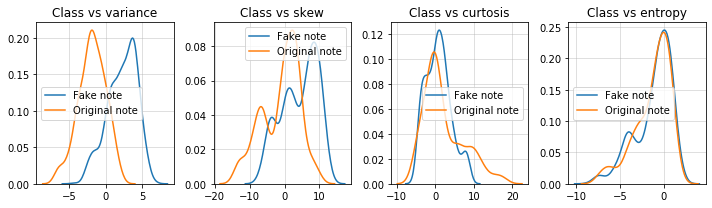

In [72]:
col_names = banknote_dataset.drop('class', axis = 1).columns.tolist()

plt.figure(figsize = (10,3))
i = 0
for col in col_names:
    plt.subplot(1,4,i+1)
    plt.grid(True, alpha =0.5)
    sns.kdeplot(banknote_dataset[col][banknote_dataset['class'] ==0], label = 'Fake note')
    sns.kdeplot(banknote_dataset[col][banknote_dataset['class'] ==1], label = 'Original note')
    plt.title('Class vs ' + col)
    plt.tight_layout()
    i+=1
plt.show()

In [73]:
from sklearn.externals.six import StringIO

import graphviz
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


In [74]:
!conda install -c conda-forge pydotplus -y
import pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\hp\anaconda3

  added / updated specs:
    - pydotplus


The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


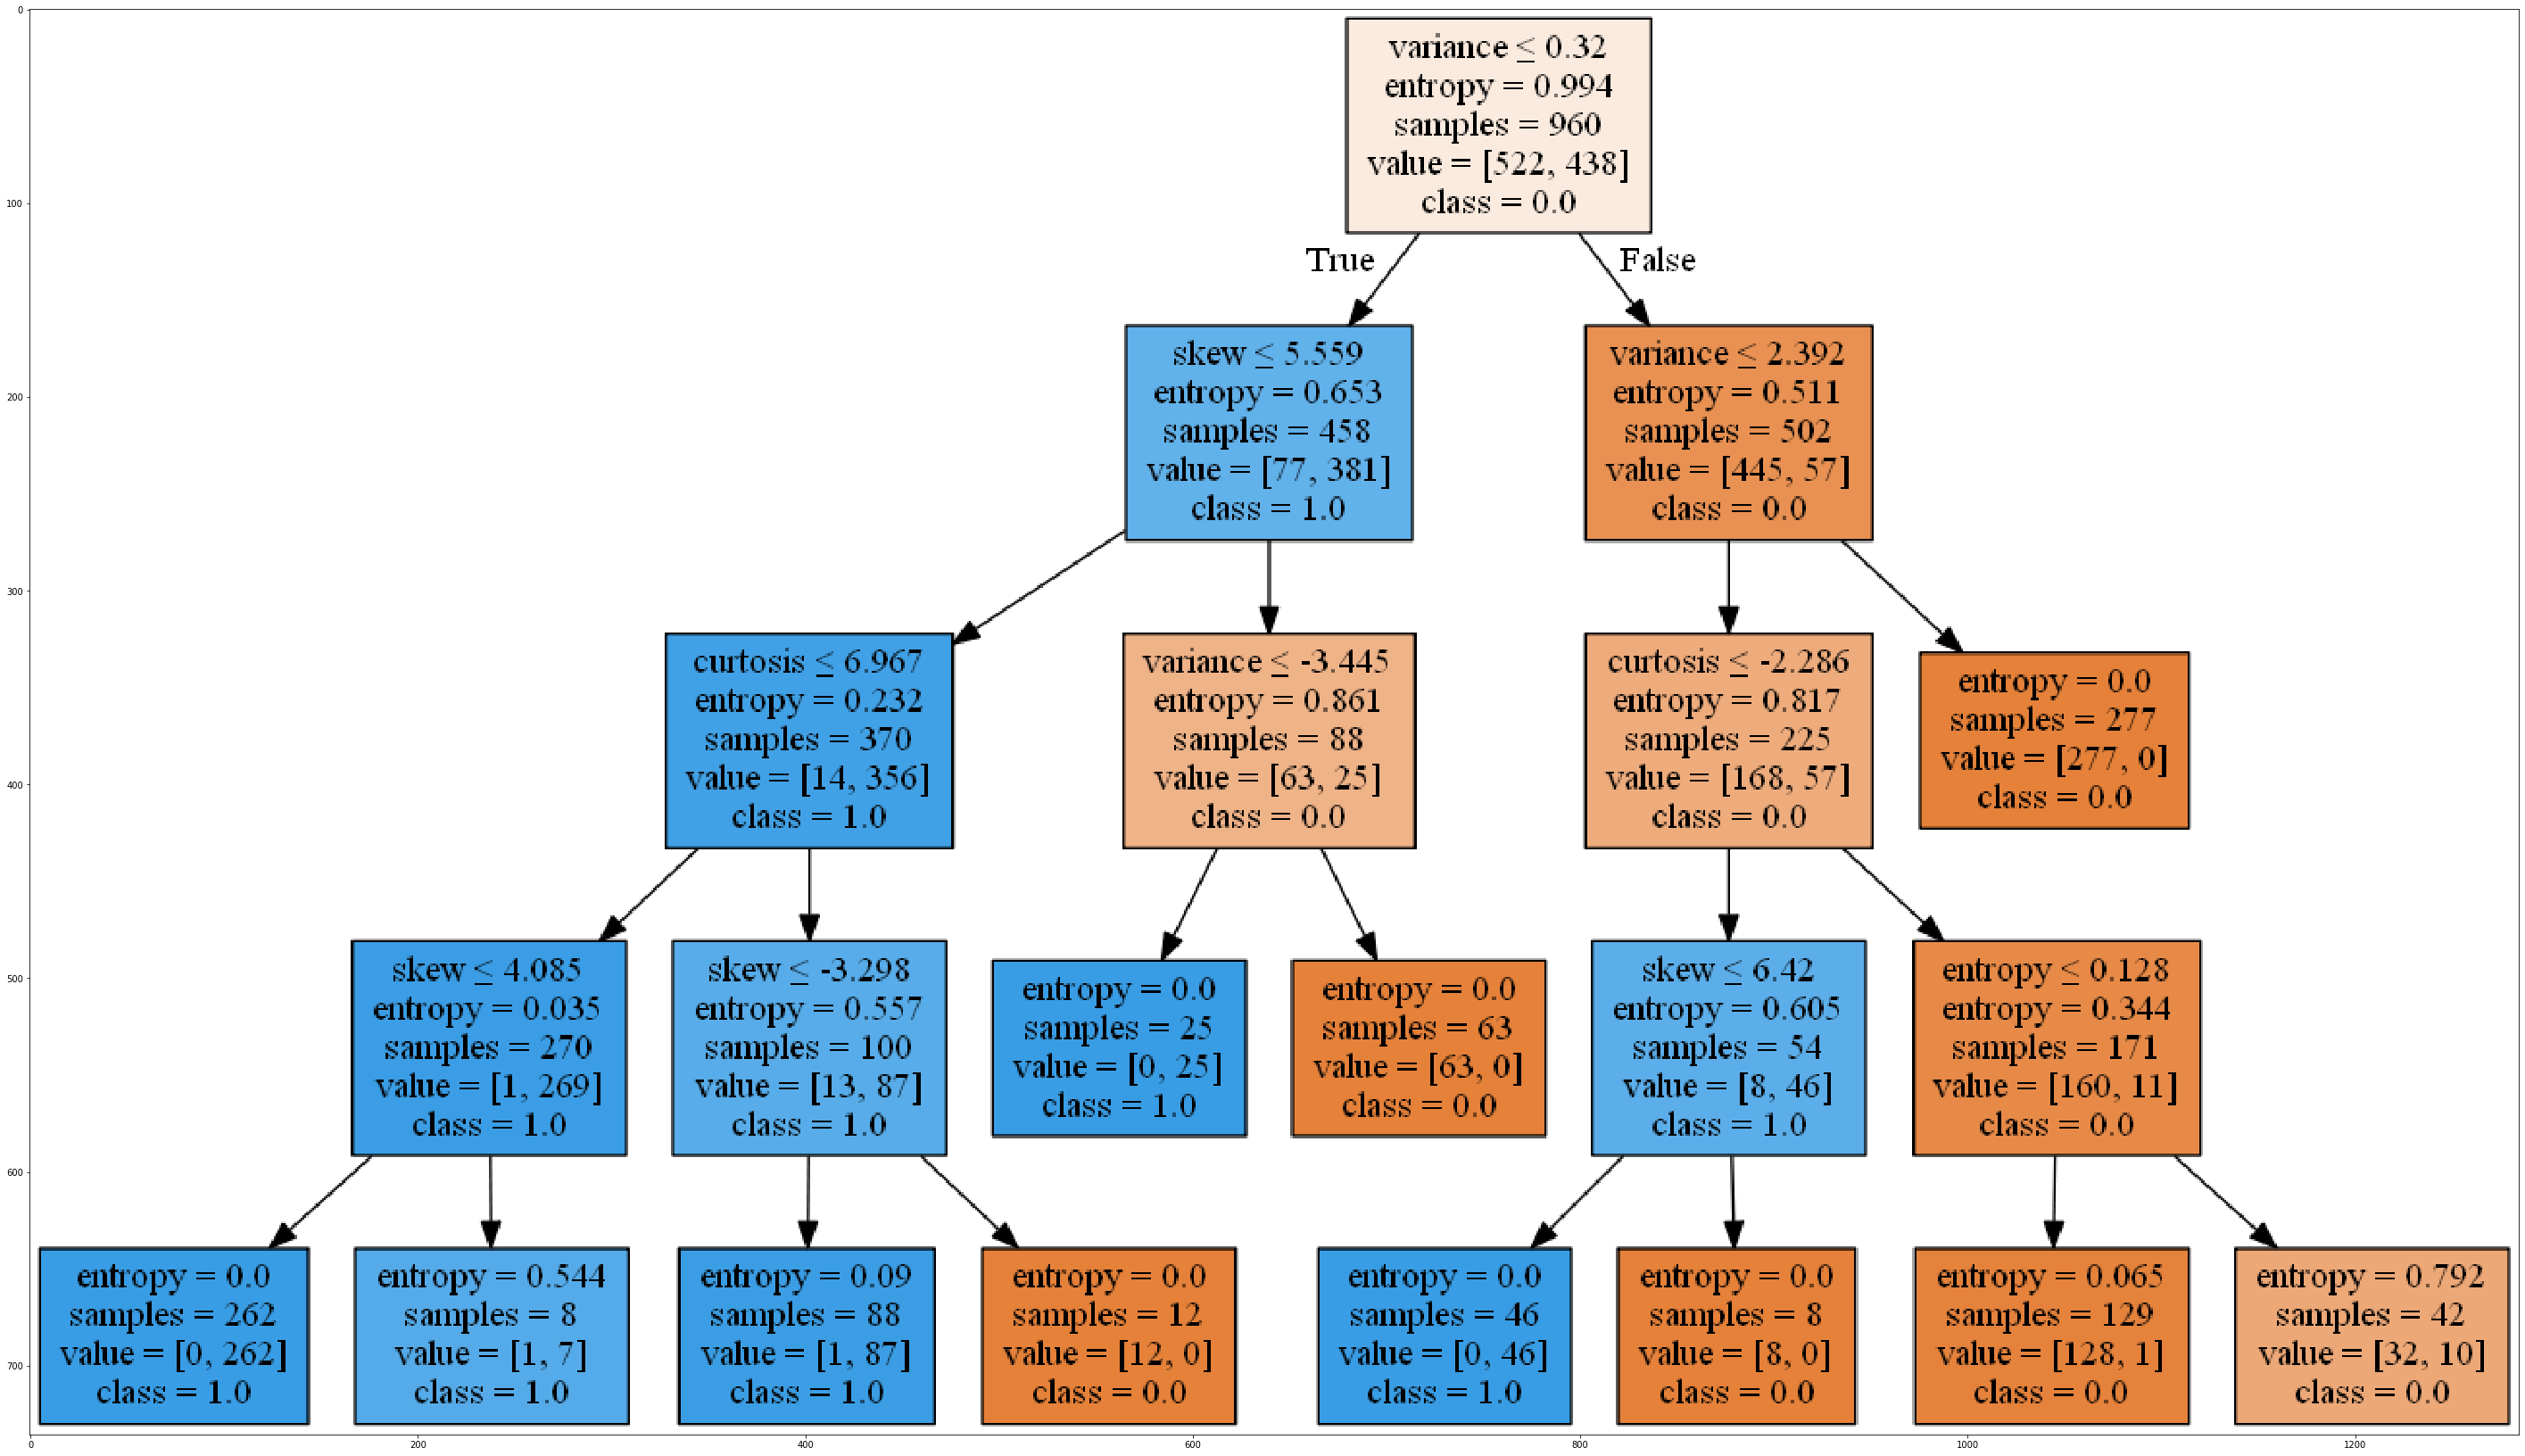

In [76]:
dot_data = StringIO()
filename = "banktree.png"
featureNames = df.columns[0:4]
targetNames = df["class"].unique().tolist()
out=tree.export_graphviz(bank_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(50, 60))
plt.imshow(img,interpolation='nearest')